<h2 align='center'>Numerical Optimization and Large Scale Linear Algebra</h2>

<h3 align='center'>Assignment 1</h3>


<h4 align='center'>Dimitris Stathopoulos (f3352318) </h4>


## Import the data file -> (housedata.mat)
Here we imported the file and visualize it as a dataframe( as a matrix)

In [1]:
import scipy.io as sio
import pandas as pd
# Load the MATLAB file
data = sio.loadmat('housedata.mat')

# Access the array under the key 'X'
array_X = data['X']

# Count the number of rows
num_rows = array_X.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

# Transform the data to a pandas dataframe 
df = pd.DataFrame(data['X'], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'y'])
print(df)



Number of rows: 774
     x1  x2  x3    x4  x5       y
0     2   2   2   941   1   94905
1     2   3   2  1146   0   98937
2     2   3   2   909   0  100309
3     3   3   2  1289   0  106250
4     3   3   1  1020   0  107502
..   ..  ..  ..   ...  ..     ...
769   3   4   3  2280   0  232425
770   3   3   2  1477   0  234000
771   2   3   2  1216   0  235000
772   3   4   2  1685   0  235301
773   4   3   2  1362   0  235738

[774 rows x 6 columns]


## Split the DataSet

Here we split the dataset as requested by the starting sentence of the project description.

In [2]:
# Get the first 695 rows as the training set
training_set = df.head(695)

# Get the rest of the rows as the testing set
testing_set = df.tail(df.shape[0] - 695)

# Print the shapes of the training and testing sets
print("Shape of training set:", training_set.shape)
print("Shape of testing set:", testing_set.shape)

Shape of training set: (695, 6)
Shape of testing set: (79, 6)


1. Use the columns x4 containing the area of each house and x2 containing the number of
bedrooms in order to create a regression model of the form
𝑦̂ = 𝛽1𝑥1 + 𝛽2𝑥2 + c

In [3]:
from sklearn.linear_model import LinearRegression

# Extract the 'x4' (area) and 'x2' (number of bedrooms) columns
X_train = training_set[['x4', 'x2']].values

# Extract the target variable 'y'
y_train = training_set['y'].values

# Extract the 'x4' (area) and 'x2' (number of bedrooms) columns
X_test = testing_set[['x4', 'x2']].values
y_test = testing_set['y'].values

# Initialize an object for a linear regression model
model = LinearRegression()

# Fit the training data to our model
model.fit(X_train, y_train)




LinearRegression()

2. Create a scatter plot of actual and predicted sale price for all 774 houses.

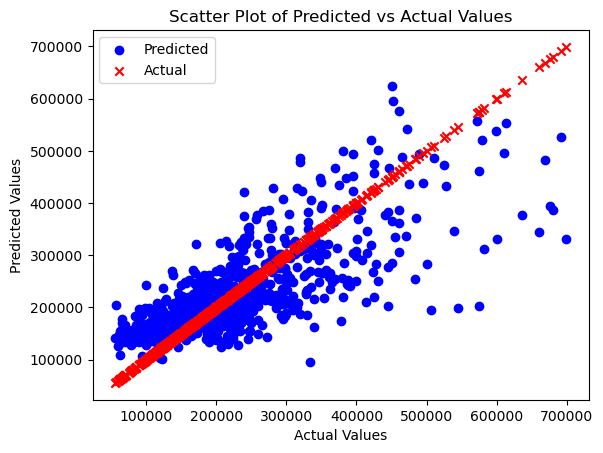

In [4]:
import matplotlib.pyplot as plt

# Predictions for the whole dataset
y_pred = model.predict(df[['x4', 'x2']].values)

# Scatter plot with legend
plt.scatter(df['y'].values, y_pred, label='Predicted', color='blue')
plt.scatter(df['y'].values, df['y'].values, label='Actual', color='red', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()


In the above plot, we can observe the actual values(red) in contrast to the predicted values (blue). The predicted values are closely distributed around the actual values but there also a lot of values that have large deviations from their actual value. All in all, it seems promising but there is also the posibility that the RMS error might be extensive.

3. Use the following 5 houses to test the efficiency of the above method


| House| X1| X2| Actual price|
| -----| -----| -----| ------|  
| 1| 846 | 1 | 115000| 
| 2| 1324 | 2 | 234500| 
| 3| 1150 | 3 | 198000| 
| 4| 3037 | 4 | 528000| 
| 5| 3984 | 5 |  572500| 

## Firstly transform the table to python usable dataframe

In [5]:
import pandas as pd

data = {
    'House': [1, 2, 3, 4, 5],
    'X1': [846, 1324, 1150, 3037, 3984],
    'X2': [1, 2, 3, 4, 5],
    'Actual_price': [115000, 234500, 198000, 528000, 572500]
}

df_5 = pd.DataFrame(data)

# If needed, explicitly convert columns to one-dimensional arrays
df_5['House'] = df_5['House'].values
df_5['X1'] = df_5['X1'].values
df_5['X2'] = df_5['X2'].values
df_5['Actual_price'] = df_5['Actual_price'].values

print(df_5)


   House    X1  X2  Actual_price
0      1   846   1        115000
1      2  1324   2        234500
2      3  1150   3        198000
3      4  3037   4        528000
4      5  3984   5        572500


* Then we made a scatter plot representing the predicted vs actual values for the mini dataset we created on the previous cell of code.

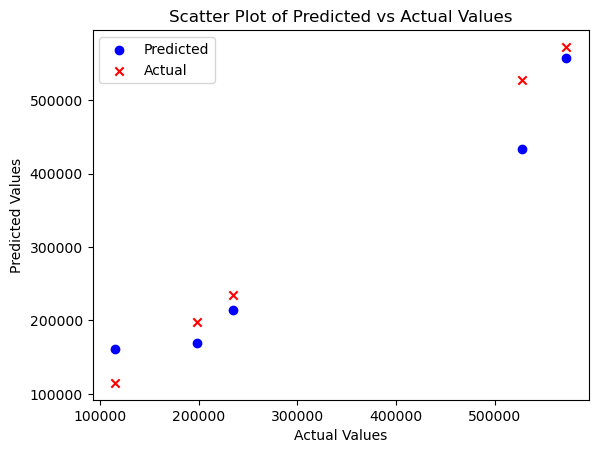

In [6]:
# our actual values are
actual_values = df_5['Actual_price'].values

# use our model on new X1 and X2
predictions = model.predict(df_5[['X1', 'X2']].values)

# Scatter plot with legend
plt.scatter(actual_values, predictions, label='Predicted', color='blue')
plt.scatter(actual_values, actual_values, label='Actual', color='red', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.show()

From this plot we understand that the predicted values were close to the actual but the results are not optimal. The optimal solution that provides the smaller error should that the blue points match exactly the position of the red (actual) target variables.

4. Find the Root-Mean-Square Error (RMSE) for the training and test data. If they are close enough
we have increased confidence that our model has reasonable generalization ability 

* Calculate the Root-Mean-Squared Error for our training set

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the values of training set
y_train_pred = model.predict(X_train)

# Calculate the rmse
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"The Root Mean Squared Error for testing set is: {rmse_train:.2f}")

The Root Mean Squared Error for testing set is: 77810.97


Here the root mean squared error for training set is extensive. There might be a couple of reasons:
* The Linear Regression we are using does not explain the data and does not defferentiate the data in order to classify them effectively
* The training columns (X4, X2) do not explain the data we have at hand and do not provide us confidence to generalize the Linear model

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the values of testing set
y_test_pred = model.predict(X_test)

# Calculate the rmse
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"The Root Mean Squared Error for testing set is: {rmse_test:.2f}")

The Root Mean Squared Error for testing set is: 40413.85


* Here we can observe that the RMSE droped to 40413.85 from 77810.97 which means that the model performs with a somewhat acceptable efficiency on the testing set. But, it should be noted that the testing set does not have that many values, so we are also not confident for the generalization of the model!

* The RMSE is not desirable in both training and testing set, it might be that X4 and X2 do not explain our data that much. Another way to say it is, that the X4, X2 do not contribute to the underlying model.

5.

We develop a more complicated regression model for the house sales data.. For this more
    complex model we will use four base attributes or original features:

    1) x1 is the area of the house (in 1000 square feet),
    2) x2 is the number of bedrooms,
    3) x3 is equal to one if the property is a condominium, and zero otherwise,
    4) x4 is the five-digit ZIP code. 

First, we created a mapping function to create the 8-basis function. As discribed by the equation:

* ̂y= ∑𝜃𝑖 𝑛 𝑖=1 𝑓𝑖 (𝑥)

In [9]:


# Function to create the fn(x) with n being {1,2,3,4,5}
# to import these values to our complex model
def value_mapping(x4, x2, x5, f_2, f_3, f_4, y):
    """
    
    :param x4: is the area of the house (in 1000 square feet),
    :param x2: is the number of bedrooms,
    :param x5: is equal to one if the property is a condominium, and zero otherwise, 
    :param f_2: some parameter,
    :param f_3: some parameter,
    :param f_4: some parameter,
    :param y: target variable
    :return: 
    """
    f1 = 1
    f2 = x4
    f3 = max(x4 - 1500, 0)
    f4 = x2
    f5 = x5
    f6 = f_2
    f7 = f_3
    f8 = f_4
    return f1, f2, f3, f4, f5, f6, f7, f8, y


# Perform one-hot encoding 
one_hot_encoded = pd.get_dummies(df['x1'], prefix='f', drop_first=True)
df = pd.concat([df, one_hot_encoded], axis=1)

# Convert boolean columns to integers (0 and 1)
df[['f_2', 'f_3', 'f_4']] = df[['f_2', 'f_3', 'f_4']].astype(int)


print(df[df['x1']==4])



     x1  x2  x3    x4  x5       y  f_2  f_3  f_4
60    4   3   2  1820   0  200000    0    0    1
107   4   3   2  2185   0  344250    0    0    1
120   4   3   2  2846   0  395000    0    0    1
125   4   5   3  2687   0  460000    0    0    1
129   4   4   2  2462   0  539000    0    0    1
..   ..  ..  ..   ...  ..     ...  ...  ...  ...
665   4   5   3  3579   0  610000    0    0    1
717   4   3   2  1104   0  170000    0    0    1
747   4   3   2  1371   0  208250    0    0    1
765   4   3   2  1358   0  229027    0    0    1
773   4   3   2  1362   0  235738    0    0    1

[70 rows x 9 columns]


Create a new dataframe with the mapped values (for later use)

In [10]:
"""
    We initialize the values from the housedata.mat file us 
    df[x1] -> location of the house
    df[x2] -> # of bedrooms
    df[x3] -> # of bathrooms
    df[x4] -> area of the house(on 1000 square feet)
    df[x5] -> 1 if condo, 0 otherwise

"""
mapped_values = df.apply(lambda row: value_mapping(row['x4'],
                                                    row['x2'], row['x5'], row['f_2'], row['f_3'], row['f_4'], row['y']), axis=1)


# Create a new DataFrame with the mapped values
mapped_df = pd.DataFrame(mapped_values.tolist(), columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'y'])


# Visualize Mapped DataFrame
print(mapped_df)






     f1    f2   f3  f4  f5  f6  f7  f8       y
0     1   941    0   2   1   1   0   0   94905
1     1  1146    0   3   0   1   0   0   98937
2     1   909    0   3   0   1   0   0  100309
3     1  1289    0   3   0   0   1   0  106250
4     1  1020    0   3   0   0   1   0  107502
..   ..   ...  ...  ..  ..  ..  ..  ..     ...
769   1  2280  780   4   0   0   1   0  232425
770   1  1477    0   3   0   0   1   0  234000
771   1  1216    0   3   0   1   0   0  235000
772   1  1685  185   4   0   0   1   0  235301
773   1  1362    0   3   0   0   0   1  235738

[774 rows x 9 columns]


## Split the new mapped dataframe n training and testing splits

In [11]:
# Get the first 695 rows as the training set
m_training_set = mapped_df.head(695)

# Get the rest of the rows as the testing set
m_testing_set = mapped_df.tail(df.shape[0] - 695)

# Print the shapes of the training and testing sets
print("Shape of training set:", m_training_set.shape)
print("Shape of testing set:", m_testing_set.shape)

Shape of training set: (695, 9)
Shape of testing set: (79, 9)


6. Find the new model resulting by the new base. Do question 2

Also, evaluate the model the same way we evaluated the simple Linear Regression

The Root Mean Squared Error for testing set is: 47174.31


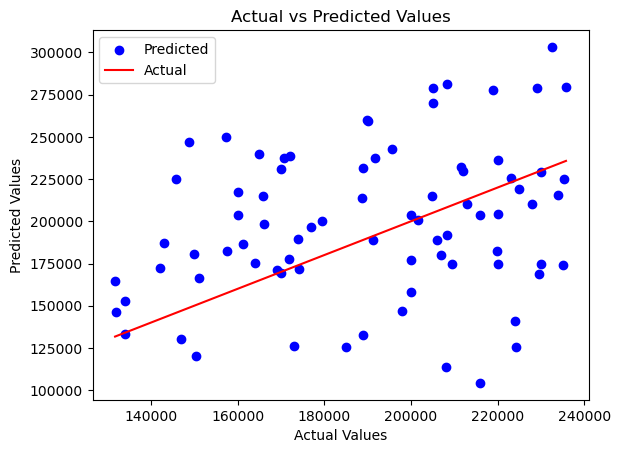

In [12]:
from sklearn.linear_model import LinearRegression

m_X_train = m_training_set[['f1','f2','f3','f4','f5', 'f6','f7', 'f8']].values
m_X_test = m_testing_set[['f1','f2','f3','f4','f5', 'f6', 'f7', 'f8']].values

m_y_train = m_training_set['y'].values
m_y_test = m_testing_set['y'].values

complex_model = LinearRegression()

complex_model.fit(m_X_train, m_y_train)

predictions = complex_model.predict(m_X_test)

# Calculate the rmse
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The Root Mean Squared Error for testing set is: {rmse_test:.2f}")

# Plot actual vs predicted values
plt.scatter(m_y_test, predictions, color='blue', label='Predicted')
plt.plot(m_y_test, m_y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


* The plot indicates that most of the predicted values do not much the actual ones. In fact, there is a small number of them that come close to the actual value.
* We expect here the root mean squared error to also be non acceptable with high margins!


<h2 align='center'> Cross validation </h2>

Use the cross validation technique for the above 2 models to testify the confidence in the
generalization of the model.

In the following code we are performing:

* Cross validation operation for the simple linear model


* Cross validation operation for the complex linear model

In [16]:
import numpy as np
import scipy.io as sio
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'mapped_df' is your DataFrame containing the features and target variable
X = mapped_df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']].values
y = mapped_df['y'].values

# Create a linear regression model based the 8-basis functions
complex_model = LinearRegression()

# Perform 10-fold cross-validation with MSE as the scoring metric
nrmse = cross_val_score(complex_model, X, y, cv=10, scoring='neg_root_mean_squared_error')


print(f'Mean RMSE of the complex Linear Regression Model is: {nrmse.mean()*-1: .2f}')



# Load the MATLAB file
data = sio.loadmat('housedata.mat')

# Access the array under the key 'X'
array_X = data['X']

# Count the number of rows
num_rows = array_X.shape[0]

# Transform the data to a pandas dataframe 
df = pd.DataFrame(data['X'], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'y'])


# Create a simple linear regression model
simple_model = LinearRegression()

nrmse2 = cross_val_score(simple_model, df[['x4', 'x2']].values, df['y'].values, scoring='neg_root_mean_squared_error')

print(f'Mean RMSE for the simple Linear Regression model is: {nrmse2.mean()*-1: .2f}')



Mean RMSE of the complex Linear Regression Model is:  67293.47
Mean RMSE for the simple Linear Regression model is:  74620.98
